# **ALP Data Mining**

**Kelompok 5:**
* Angela Melia Gunawan / 0706022310023
* Rayna Shera Chang / 0706022310022
* Heidy Mudita Sutedjo / 0706022310044

# **Estimation of Obesity Levels Based On Eating Habits and Physical Condition (Classification Task)**
---
This dataset contains data for estimating obesity levels among individuals from Mexico, Peru, and Colombia based on their eating habits and physical condition. The dataset consists of 2,111 records with 17 attributes. Of the total data, 77% was generated synthetically using the Weka tool with the SMOTE filter, while the remaining 23% was collected directly from users through a web platform.

The classification goal is to **predict an individual's obesity level based on their eating habits and physical condition attributes**.

The target class variable includes seven obesity categories:
* Insufficient Weight
* Normal Weight
* Overweight Level I
* Overweight Level II
* Obesity Type I
* Obesity Type II
* Obesity Type III

**Business Objectives:**

The primary business objective of this project is to **leverage data-driven insights to identify and predict obesity levels in individuals** based on their eating habits and physical condition. Accurate obesity level classification can support decision-making in healthcare, wellness, and public health initiatives.

By systematically **comparing and evaluating multiple model configurations**, this project ensures that the final selected model delivers both strong technical performance and meaningful business value.

<br>

**Source:** https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTENC

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# **Data Understanding**

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/amgunawan/DataMining-Dataset/refs/heads/main/obesity-levels.csv'
df = pd.read_csv(url)

# Preview the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Check shape of the dataset
df.shape

(2111, 17)

In [ ]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**Data Description**

The dataset contains a total of 17 columns, and the description of each attribute is as follows:
* `Gender` (Categorical): Biological sex of the individual.
* `Age` (Continuous): Age of the individual in years.
* `Height` (Continuous): Height of the individual.
* `Weight` (Continuous): Weight of the individual.
* `family_history_with_overweight` (Binary): Indicates whether the individual has a family * member who has suffered or suffers from overweight.
* `FAVC` (Binary): Indicates whether the individual frequently consumes high-calorie food.
* `FCVC` (Integer): Represents the frequency of vegetable consumption in daily meals.
* `NCP`  (Continuous): Indicates the number of main meals consumed per day.
* `CAEC` (Categorical): Describes whether the individual eats food between meals.
* `SMOKE` (Binary): Indicates whether the individual smokes.
* `CH2O`  (Continuous): Represents the amount of water the individual drinks daily.
* `SCC` (Binary): Indicates whether the individual monitors the calories they consume daily.
* `FAF` (Continuous): Frequency of physical activity performed by the individual.
* `TUE` (Integer): Amount of time spent using technological devices such as cell phones, computers, television, or video games.
* `CALC` (Categorical): Frequency of alcohol consumption.
* `MTRANS` (Categorical): Primary mode of transportation used by the individual.
* `NObeyesdad` (Categorical): Obesity levels (target variable).

The dataset contains no missing (null) values.

In [ ]:
# View the statistical summary of numerical variables
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# **Data Preparation**

In [ ]:
# Inspecting the unique values
for column in df.columns:
    print(f"Unique values for column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values for column 'Gender':
['Female' 'Male']


Unique values for column 'Age':
[21.       23.       27.       ... 22.524036 24.361936 23.664709]


Unique values for column 'Height':
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]


Unique values for column 'Weight':
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]


Unique values for column 'family_history_with_overweight':
['yes' 'no']


Unique values for column 'FAVC':
['no' 'yes']


Unique values for column 'FCVC':
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.75

## **Handling Missing Values**

In [ ]:
# Check for missing values in dataset
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


## **Removing Duplicates**

In [ ]:
# Check for duplicate rows in dataset
df[df.duplicated(keep=False)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
105,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
208,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
# Drop duplicate records and keep only one instance for each duplicated entry
df = df.drop_duplicates(keep='first')

## **Addressing Outliers**

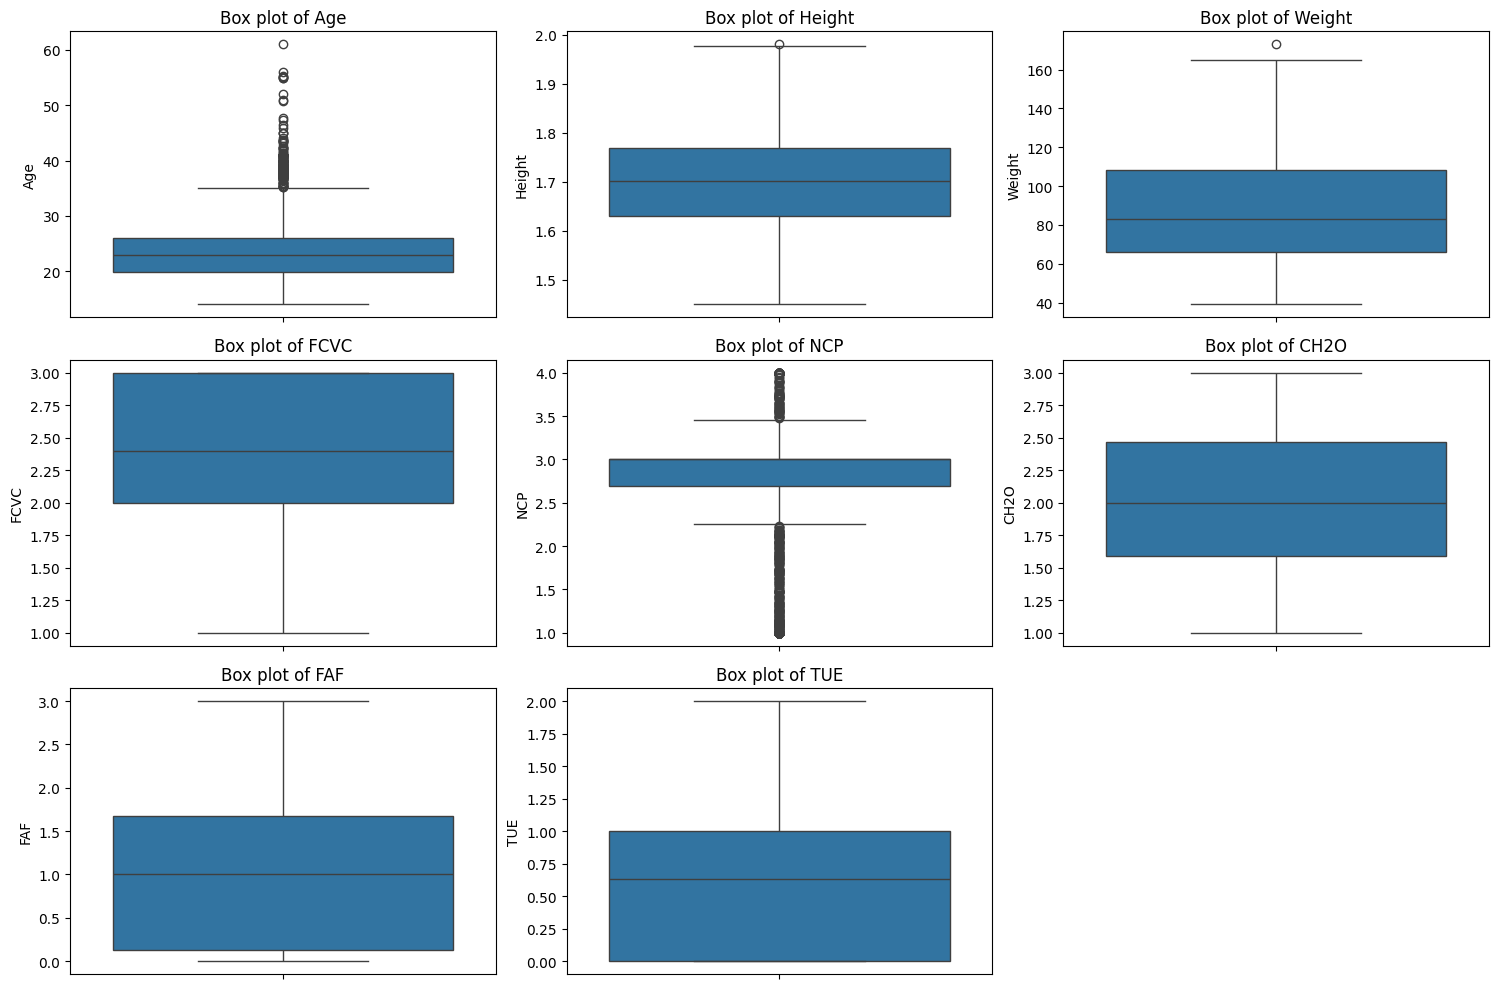

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

Outliers were not removed from the dataset, as extreme values are expected and meaningful in obesity-related data. Removing them could bias the model and reduce its ability to correctly classify higher obesity levels. Instead, the dataset is kept intact to preserve real-world variability and allow fair comparison across multiple model configurations.

## **Data Types**

In [ ]:
# Check data types of all columns
df.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


All columns have appropriate and consistent data types that correctly represent their respective attributes; therefore, no data type conversion is required.

# **Exploratory Data Analysis (EDA)**

## **Age Distribution of Individuals**

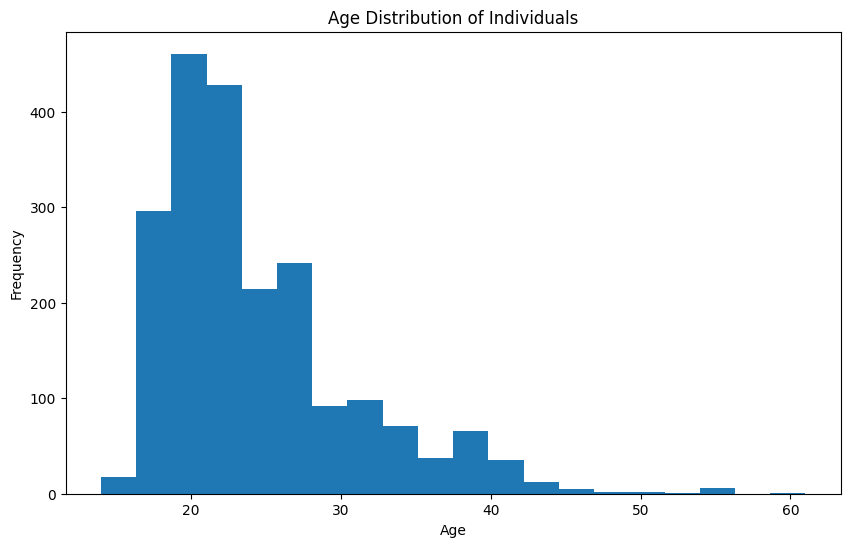

In [ ]:
# @title
plt.figure(figsize=(10, 6))

plt.hist(df['Age'], bins=20)
plt.title('Age Distribution of Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

**Insights:**
* **Strong concentration in early adulthood:** Most individuals are clustered between 18-25 years old, indicating this is the dominant age group.
Peak around 20-22 years: The highest frequency appears in the early 20s, suggesting a young population base (likely students or early-career individuals).
* **Right-skewed distribution:** The distribution tails off gradually toward older ages, meaning fewer individuals as age increases.
* **Moderate presence in late 20s-early 30s:** There is still a noticeable number of individuals between 26-35, but significantly fewer than the early 20s group.
* **Sharp decline after mid-30s:** Ages 40+ appear infrequently, indicating limited representation of older individuals.
* **Outliers at higher ages:** A small number of individuals are present in the 50-60+ range, suggesting rare but existing older participants.
* **Overall demographic profile:** The population is predominantly young, with minimal older-age representation.

## **Height vs Weight by Obesity Level**

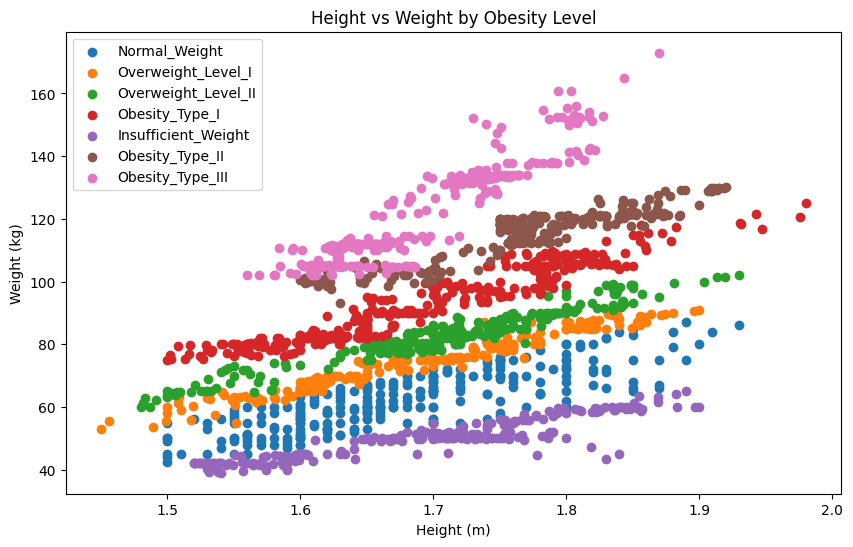

In [ ]:
# @title
plt.figure(figsize=(10, 6))

for label in df['NObeyesdad'].unique():
    subset = df[df['NObeyesdad'] == label]
    plt.scatter(subset['Height'], subset['Weight'], label=label)

plt.title('Height vs Weight by Obesity Level')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.legend()

plt.show()

**Insights:**
* There is a **clear positive correlation between height and weight**: taller individuals generally weigh more.
* Data points form **parallel upward trends**, indicating consistent scaling of weight with height across the population.
* **Height ranges overlap heavily**, suggesting height alone does not distinguish body categories well.
* **Weight shows much greater variation** than height, making it the dominant factor in differentiating individuals.
* At similar heights, weights can differ substantially, indicating **body composition differences** rather than stature.
* The spread of data widens at higher weights, showing **increasing variability** among heavier individuals.
* The overall pattern suggests **classification is driven primarily by weight relative to height**, not absolute height.
* The visualization effectively illustrates how **body mass increases disproportionately compared to height** in higher ranges.

## **Correlation Matrix of Numerical Features**

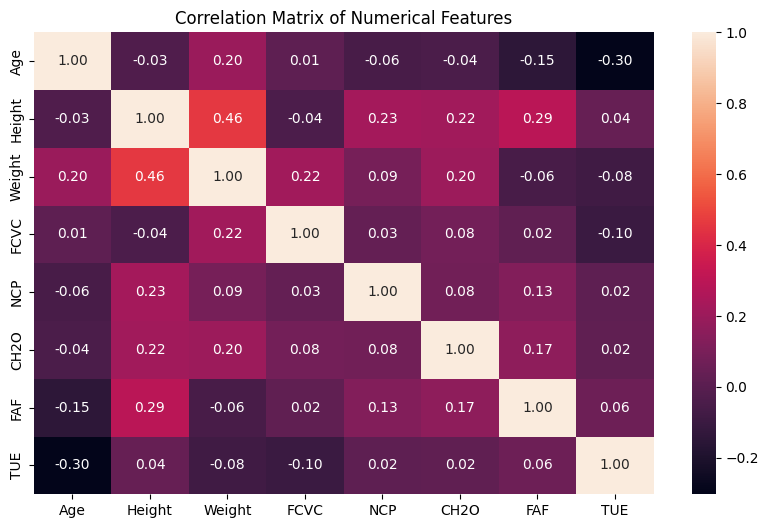

In [ ]:
# @title
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 6))

sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')

plt.show()

**Insights:**
* **Weight and BMI have a very strong positive correlation**, indicating BMI is heavily driven by body weight.
* **Height shows a moderate positive relationship with weight**, meaning taller individuals tend to weigh more, but height alone is not dominant.
* **Age has generally weak correlations** with most numerical features, suggesting age is not a strong predictor in this dataset.
* Most correlations are low to moderate, indicating the features capture **different aspects of behavior, lifestyle, and physical condition**.
* **Lifestyle-related variables** (e.g., physical activity, technology use, water intake) show **weak correlations with physical measurements**, implying complex or indirect relationships.
* **Negative correlations are present but mild**, suggesting inverse relationships exist but are not strong enough to act as sole predictors.
* The dataset shows **low multicollinearity overall**, except for the strong link between weight and BMI.
* This pattern suggests the data is w**ell-suited for multivariate analysis or machine learning**, as most variables contribute unique information.

## **Impact of Family History on Obesity**

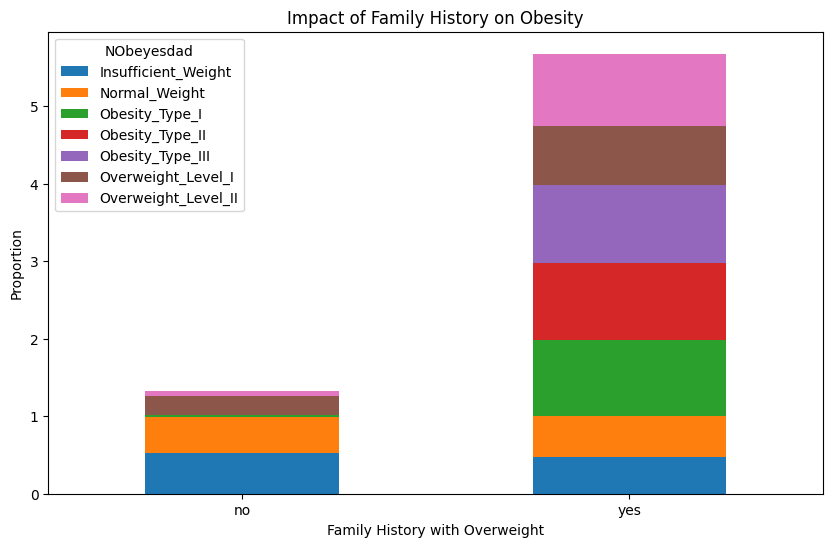

In [ ]:
# @title
fig, ax = plt.subplots(figsize=(10, 6))

fh_counts = pd.crosstab(
    df['family_history_with_overweight'],
    df['NObeyesdad'],
    normalize='columns'
    )

fh_counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Impact of Family History on Obesity')
plt.xlabel('Family History with Overweight')
plt.ylabel('Proportion')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

**Insights:**
* Individuals **with a family history of overweight** show a **much higher proportion of overweight and obesity outcomes** compared to those without.
* The **absence of family history** is associated with a distribution concentrated in **lower and normal weight ranges**.
* Family history appears to be a **strong influencing factor** in obesity-related outcomes.
* The contrast between “yes” and “no” groups suggests a **genetic and/or shared lifestyle effect**.
* Higher severity weight conditions are **rare when there is no family history**, but become common when family history is present.
* The visualization highlights family history as an **important risk indicator** rather than a minor contributing variable.
* Overall, the pattern supports the idea that obesity risk is **not random**, but influenced by inherited or environmental factors within families.

# **Feature Engineering**

## **Data Encoding**

In [ ]:
# Duplicate the dataset
df_encoded = df.copy()

In [ ]:
# One-Hot Encoding
one_hot_map = {
    'Gender': {'Female': 0, 'Male': 1},
    'family_history_with_overweight': {'no': 0, 'yes': 1},
    'FAVC': {'no': 0, 'yes': 1},
    'SMOKE': {'no': 0, 'yes': 1},
    'SCC': {'no': 0, 'yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

In [ ]:
# Nominal Encoding
nominal_cols = ['MTRANS']

encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

{'MTRANS': {'Automobile': 0,
            'Bike': 1,
            'Motorbike': 2,
            'Public_Transportation': 3,
            'Walking': 4}}


In [ ]:
# Ordinal Encoding
frequency = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
    }
df_encoded['CAEC'] = df_encoded['CAEC'].map(frequency)
df_encoded['CALC'] = df_encoded['CALC'].map(frequency)

obesity_levels = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
    }
df_encoded['NObeyesdad'] = df_encoded['NObeyesdad'].map(obesity_levels)

In [ ]:
df_encoded.sample(n = 5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
35,0,21.000000,1.500000,65.000000,1,0,2.000000,3.000000,1,0,2.000000,0,2.000000,2.000000,1,3.0,3
2108,0,22.524036,1.752206,133.689352,1,1,3.000000,3.000000,1,0,2.054193,0,1.414209,0.646288,1,3.0,6
966,1,29.153907,1.773656,87.070234,0,1,1.595746,3.618722,1,0,1.274389,0,1.504003,0.370067,0,0.0,2
1686,1,23.812795,1.767121,116.164351,1,1,1.655684,3.000000,1,0,2.000000,0,0.976425,0.690082,1,3.0,5
578,0,19.000000,1.530875,42.000000,0,0,2.844607,1.273128,2,0,1.695510,0,0.260079,0.635867,1,3.0,0


In [ ]:
# Checking encode result
df.loc[1344]

,1344
Gender,Male
Age,18.0
Height,1.844218
Weight,109.195529
family_history_with_overweight,yes
FAVC,yes
FCVC,2.0
NCP,1.548407
CAEC,Sometimes
SMOKE,no


## **Normalization, Standardization, Binning, etc**

Scaling was intentionally omitted as it does not improve performance for tree-based models.

## **New Features & Binning**

In [ ]:
# New Feature `BMI`
df_fe = df_encoded.copy()
df_fe["BMI"] = df_fe["Weight"] / (df_fe["Height"] ** 2)

# BMI Binning
df_fe["BMI_bin"] = pd.cut(
    df_fe["BMI"],
    bins=[0, 18.5, 25, 27, 30, 35, 40, np.inf],
    labels=[0, 1, 2, 3, 4, 5, 6],
    # Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III
    right=False
)

df_fe["BMI_bin"] = df_fe["BMI_bin"].astype(int)

In [ ]:
# Age Binning
df_fe["Age_bin"] = pd.cut(
    df_fe["Age"],
    bins=[0, 18, 30, 45, 60, 100],
    labels=[0, 1, 2, 3, 4], # Teen, Young Adult, Adult, Middle-Aged, Senior
    right=False
)

In [ ]:
# FAF (Physical Activity) Binning
df_fe["FAF_bin"] = pd.cut(
    df_fe["FAF"],
    bins=[-0.01, 0.5, 1.5, 3.0],
    labels=[0, 1, 2], # Low Activity, Moderate Activity, High Activity
    right=True
)

In [ ]:
# TUE (Technology Use Binning) Binning
df_fe["TUE_bin"] = pd.cut(
    df_fe["TUE"],
    bins=[-0.01, 0.5, 1.5, 3.0],
    labels=[0, 1, 2], # Low screen time, Moderate, High
    right=True
)

In [ ]:
# CH2O (Water Consumption) Binning
df_fe["CH2O_bin"] = pd.cut(
    df_fe["CH2O"],
    bins=[-0.01, 1.0, 2.0, 3.5],
    labels=[0, 1, 2], # Low Hydration, Adequate, High
    right=True
)

In [ ]:
# FCVC (Vegetable Consumption) Binning
df_fe["FCVC_bin"] = pd.cut(
    df_fe["FCVC"],
    bins=[-0.01, 1.5, 2.5, 3.5],
    labels=[0, 1, 2], # Low vegetable intake, Moderate, High
    right=True
)

In [ ]:
# NCP (Meal Frequency) Binning
df_fe["NCP_bin"] = pd.cut(
    df_fe["NCP"],
    bins=[-0.01, 2.0, 3.0, 5.0],
    labels=[0, 1, 2], # Low, Normal (3 meals a day), Frequent
    right=True
)

bin_cols = [col for col in df_fe.columns if col.endswith("_bin")]
df_fe[bin_cols] = df_fe[bin_cols].astype("int")

# **Separate Features & Target**

In [ ]:
# X are the features, y is the target attribute
X = df_fe.drop('NObeyesdad', axis=1)
y = df_fe['NObeyesdad']

In [ ]:
pd.set_option('display.max_columns', None)
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,BMI_bin,Age_bin,FAF_bin,TUE_bin,CH2O_bin,FCVC_bin,NCP_bin
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3.0,24.386526,1,1,0,1,1,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3.0,24.238227,1,1,2,0,2,2,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3.0,23.765432,1,1,2,1,1,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4.0,26.851852,2,1,2,0,1,2,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3.0,28.342381,3,1,0,0,1,1,0


In [ ]:
y.head()

,NObeyesdad
0,1
1,1
2,1
3,2
4,3


# **Train & Test Split**

In [ ]:
# Split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((1460, 24), (627, 24))

In [ ]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,BMI_bin,Age_bin,FAF_bin,TUE_bin,CH2O_bin,FCVC_bin,NCP_bin
280,1,21.000000,1.750000,62.000000,0,1,3.0,4.000000,2,1,2.000000,0,0.000000,0.000000,1,3.0,20.244898,1,1,0,0,1,2,2
1197,1,33.151905,1.685127,83.986895,1,1,2.0,2.473911,1,0,2.452789,0,0.932792,0.000000,0,0.0,29.576464,3,2,1,0,2,1,1
102,0,21.000000,1.550000,57.000000,0,1,2.0,4.000000,2,0,2.000000,1,2.000000,0.000000,1,0.0,23.725286,1,1,2,0,1,1,2
2050,0,20.741442,1.694439,122.813033,1,1,3.0,3.000000,1,0,1.409444,0,0.933595,0.840393,1,3.0,42.775252,6,1,1,1,1,2,1
852,0,21.016623,1.755427,78.300084,1,1,3.0,1.000000,1,0,2.000000,0,2.877473,0.000000,1,3.0,25.409533,2,1,2,0,1,2,0


In [ ]:
y_train.head()

,NObeyesdad
280,1
1197,3
102,1
2050,6
852,2


# **Model Development (Decision Tree)**

## **Decision Tree Base Model**

### **SMOTE-NC Oversampling**

In [ ]:
# Using SMOTE-NC for dataset containing numerical and categorical features
categorical_features = [
    'Gender',
    'family_history_with_overweight',
    'FAVC',
    'CAEC',
    'SMOKE',
    'SCC',
    'CALC',
    'MTRANS'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

In [ ]:
# Split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((1719, 24), (738, 24))

### **Data Modeling**

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train_smotenc = tree.predict(X_train)
y_pred_test_smotenc = tree.predict(X_test)

print("\n=== Classification Report Decision Tree (Training Set) ===")
print(classification_report(y_train, y_pred_train_smotenc))

print("\n=== Classification Report Decision Tree (Test Set) ===")
print(classification_report(y_test, y_pred_test_smotenc))


=== Classification Report Decision Tree (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       1.00      1.00      1.00       263
           2       1.00      1.00      1.00       241
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       246
           5       1.00      1.00      1.00       239
           6       1.00      1.00      1.00       244

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719


=== Classification Report Decision Tree (Test Set) ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.98      0.99      0.98        88
           2       0.96      0.97      0.96       110
           3       0.93      0.95      0.94       109
           4    

## **Decision Tree with K-Fold Cross Validation**

In [ ]:
# Split the data into 5 folds
# The folds are made by preserving the percentage of samples for each class
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# Split() method generate indices to split data into training and testing set
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1965, Test set:492
Fold:2, Train set: 1965, Test set:492
Fold:3, Train set: 1966, Test set:491
Fold:4, Train set: 1966, Test set:491
Fold:5, Train set: 1966, Test set:491


In [ ]:
score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1_macro")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.96253172 0.96938152 0.9730726  0.98337424 0.9803196 ]
Average score: 0.97


## **Decision Tree Tuned Model**

In [ ]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

# Use f1_macro scoring for multiclass classification
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_tree = grid_search.best_estimator_
y_pred_test = best_tree.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 7, 'random_state': 41}
Best cross-validation f1 score: 0.973


In [ ]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report Decision Tree Tuned Model (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Decision Tree Tuned Model (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Decision Tree Tuned Model (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       0.99      1.00      0.99       263
           2       1.00      0.99      1.00       241
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       246
           5       1.00      1.00      1.00       239
           6       1.00      1.00      1.00       244

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719


=== Classification Report Decision Tree Tuned Model (Test Set) ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.98      0.98      0.98        88
           2       0.98      0.96      0.97       110
           3       0.96      0.98      0.97   

## **Decision Tree with Feature Importance**

### **Feature Importance**

In [ ]:
# Function for feature importance
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[1.58288978e-01 3.09169233e-03 3.20056619e-03 1.05911430e-02
 2.22957599e-03 7.69535438e-04 3.28083057e-03 1.33553564e-03
 3.34172553e-03 0.00000000e+00 4.18588728e-03 0.00000000e+00
 1.35758506e-03 3.56012903e-03 9.05056708e-04 9.05056708e-04
 7.96403684e-01 1.21524129e-03 4.77211719e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.65660443e-04]


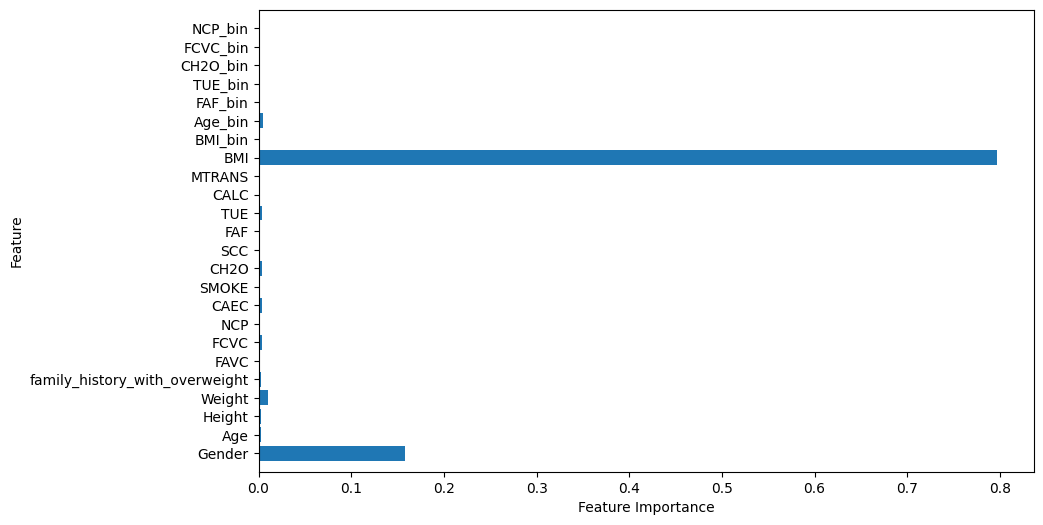

In [ ]:
# Visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(10,6))

    # Get the number of features from X_train
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')

    # Use column names from X_train as labels
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [ ]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
BMI,0.796404
Gender,0.158289


In [ ]:
# Using only important features for the prediction
important_features = ['Gender', 'BMI']

X_importance = df_fe[important_features]
y_importance = df_fe['NObeyesdad']

In [ ]:
X_importance.head()

,Gender,BMI
0,0,24.386526
1,0,24.238227
2,1,23.765432
3,1,26.851852
4,1,28.342381


In [ ]:
y_importance.head()

,NObeyesdad
0,1
1,1
2,1
3,2
4,3


### **SMOTE-NC Oversampling**

In [ ]:
categorical_features = ['Gender']

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

In [ ]:
# Split the dataset into training and testing sets with a 70:30 ratio
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

In [ ]:
# Check the shape of X_train and X_test
X_train_importance.shape, X_test_importance.shape

((1719, 2), (738, 2))

In [ ]:
importance_tree = DecisionTreeClassifier()
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report Decision Tree After Feature Importance (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report Decision Tree After Feature Importance (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report Decision Tree After Feature Importance (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       1.00      1.00      1.00       233
           2       1.00      1.00      1.00       252
           3       1.00      1.00      1.00       247
           4       1.00      1.00      1.00       250
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       245

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719


=== Classification Report Decision Tree After Feature Importance (Test Set) ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.94      1.00      0.97       118
           2       0.93      0.89      0.91        99
           3       0

##**Model Selection**

Based on the comparison of the three Decision Tree models, the **Decision Tree with hyperparameter tuning** is selected as the best-performing model. Although all models achieved perfect or near-perfect performance on the training set, the tuned model demonstrated the **most stable and balanced performance on the test set**, with higher precision, recall, and F1-score compared to the base model and the feature-importance-based model. The base model showed signs of overfitting, while the feature importance approach led to a noticeable decrease in test performance due to information loss from removed features. Therefore, the hyperparameter-tuned Decision Tree provides the **best trade-off between model complexity and generalization ability**, making it the most reliable choice for this classification task.

# **Model Development (Random Forest)**

## **Random Forest Base Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_importance, y_train_importance)

# Make predictions on the training and test sets
y_pred_train_rf = rf_clf.predict(X_train_importance)
y_pred_test_rf = rf_clf.predict(X_test_importance)

# Print classification reports
print("=== Classification Report (Random Forest - Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_rf))

print("\n=== Classification Report (Random Forest - Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_rf))

=== Classification Report (Random Forest - Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       1.00      1.00      1.00       233
           2       1.00      1.00      1.00       252
           3       1.00      1.00      1.00       247
           4       1.00      1.00      1.00       250
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       245

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719


=== Classification Report (Random Forest - Test Set) ===
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       107
           1       0.94      0.98      0.96       118
           2       0.92      0.89      0.90        99
           3       0.93      0.91      0.92       104
           4 

## **Random Forest Tuned Model using Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42],
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier(random_state=42) # Initialize a Random Forest classifier
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_macro') # Use f1 scoring for classification
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_ # Get the best estimator from the grid search
y_pred_test_rf_tuned = best_rf_clf.predict(X_test)

print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation f1 score for Random Forest: {:.3f}".format(grid_search_rf.best_score_))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest:  {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'random_state': 42}
Best cross-validation f1 score for Random Forest: 0.990


In [ ]:
final_rf = RandomForestClassifier(
    n_estimators=300,
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

final_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [ ]:
y_pred_train = final_rf.predict(X_train)
y_pred_test  = final_rf.predict(X_test)

print("\n=== Classification Report Random Forest Tuned Model (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Random Forest Tuned Model (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Random Forest Tuned Model (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       1.00      1.00      1.00       263
           2       1.00      1.00      1.00       241
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       246
           5       1.00      1.00      1.00       239
           6       1.00      1.00      1.00       244

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719


=== Classification Report Random Forest Tuned Model (Test Set) ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      0.99        88
           2       0.97      1.00      0.99       110
           3       0.99      0.96      0.98   

##**Model Selection**

Compared to the base model, the **tuned Random Forest** achieves **higher and more consistent performance on the test set**, with improvements in accuracy, precision, recall, and F1-score (around 0.99 versus 0.96 for the base model). While both models show perfect performance on the training set, the tuned model demonstrates **better generalization** and reduced misclassification across classes on unseen data. This indicates that hyperparameter tuning helps the Random Forest better capture the underlying patterns in the data without sacrificing stability, making it the most reliable model among the two.

# **Model Evaluation**

In [ ]:
# Create a comparison table from your results
data = {
    "Model": ["Decision Tree Tuned Model", "Random Forest Tuned Model"],
    "Train Accuracy": [1.00, 1.00],
    "Test Accuracy": [0.98, 0.99],
    "Train F1-Score": [1.00, 1.00],
    "Test F1-Score": [0.98, 0.99],
    "Overfitting Indicator": ["Moderate (perfect train)", "Slight (perfect train)"]
}

# Convert to DataFrame
df_results = pd.DataFrame(data)

# Display neatly
df_results.style.set_caption("Comparison of Classification Models").background_gradient(cmap="Blues", subset=["Test Accuracy", "Test F1-Score"])


,Model,Train Accuracy,Test Accuracy,Train F1-Score,Test F1-Score,Overfitting Indicator
0,Decision Tree Tuned Model,1.000000,0.980000,1.000000,0.980000,Moderate (perfect train)
1,Random Forest Tuned Model,1.000000,0.990000,1.000000,0.990000,Slight (perfect train)


* **Decision Tree with Hyperparameter Tuning:**

  * Achieves perfect performance on the training set (1.00 accuracy and macro F1-score).

  * Shows a slight decrease on the test set (accuracy and macro F1-score = 0.98), indicating moderate overfitting.
  * High variance nature of a single tree contributes to this performance gap.
  * Provides strong model interpretability, making it suitable for rule-based explanations and exploratory analysis.


* **Random Forest with Hyperparameter Tuning:**

  * Attains perfect performance on the training set (1.00 accuracy and macro F1-score).

  * Maintains higher test performance (accuracy and macro F1-score = 0.99) with a smaller generalization gap.
  * Ensemble structure reduces variance and improves robustness.
  * Slight overfitting is present, but its impact is minimal.
  * More suitable for deployment and decision support systems where predictive accuracy is critical.

## **Model Selection**

In [ ]:
import pandas as pd

# Create comparison table
data = {
    "Aspect": [
        "Interpretability",
        "Test Accuracy",
        "Overfitting Risk",
        "Robustness",
        "Deployment Suitability"
    ],
    "Decision Tree": [
        "High",
        0.98,
        "Moderate",
        "Moderate",
        "Medium"
    ],
    "Random Forest": [
        "Moderate",
        0.99,
        "Low–Slight",
        "High",
        "High"
    ]
}

df_comparison = pd.DataFrame(data)

df_comparison


,Aspect,Decision Tree,Random Forest
0,Interpretability,High,Moderate
1,Test Accuracy,0.98,0.99
2,Overfitting Risk,Moderate,Low–Slight
3,Robustness,Moderate,High
4,Deployment Suitability,Medium,High


Final Model Choice: **Random Forest**

The Random Forest model is selected as the final and preferred model because it consistently demonstrates superior performance across both technical and practical evaluation criteria. Compared to the Decision Tree, Random Forest achieves higher test accuracy and F1-score, indicating stronger predictive capability when applied to unseen data. This smaller gap between training and testing performance reflects better generalization and reduced sensitivity to overfitting.

In addition, the ensemble nature of Random Forest improves robustness by combining multiple decision trees, which helps stabilize predictions and minimize the impact of noise or synthetic patterns introduced through SMOTE. This reliability is critical for real-world healthcare and business applications, where consistent and accurate classification of obesity levels supports effective decision-making, risk assessment, and personalized interventions. Overall, Random Forest provides the best balance between performance, stability, and deployment readiness, making it the most suitable model for this classification task.

# **Insights, Interpretations and Conclusions**

## **Key Performance Insights**

**1. Overall Model Accuracy is Very High**

Both the Decision Tree and Random Forest models achieved excellent predictive performance. Training accuracy reached **100%** for both models, while test accuracy remained very high at **98% (Decision Tree)** and **99% (Random Forest)**. This indicates that the dataset contains strong and informative patterns linking eating habits and physical condition to obesity levels.

**2. Random Forest Shows Superior Generalization**

Although both models perfectly fit the training data, the Random Forest demonstrates a **smaller performance gap** between training and testing. The higher test accuracy and F1-score (0.99) suggest that Random Forest generalizes better to unseen data than the single Decision Tree.

**3. Balanced Classification Across All Obesity Categories**

Precision, recall, and F1-scores are consistently high across all seven obesity classes. This means the models are not biased toward specific weight categories and can reliably distinguish between subtle differences such as Overweight Level I vs. Obesity Type I.

**4. Impact of Synthetic Data (SMOTE)**

The strong and stable performance indicates that SMOTE successfully addressed class imbalance without introducing excessive noise. However, the perfect training accuracy also signals that models may have learned some synthetic patterns too well, requiring cautious interpretation.

## **Business and Practical Interpretations**

**1. Strong Predictive Capability for Health Screening**

The models demonstrate that obesity levels can be accurately predicted using lifestyle and physical condition variables. This supports applications such as early obesity risk screening, personalized health recommendations, and preventive healthcare programs.

**2. Actionable Insights for Public Health Programs**

Features such as physical activity frequency (FAF), eating habits (FAVC, FCVC, CAEC), and water intake (CH2O) likely play a crucial role in classification. These variables can be targeted in **behavioral intervention strategies**.

**3. Reliable Multi-Class Decision Support**

The consistent performance across seven obesity categories enables more granular health interventions rather than binary “obese vs. non-obese” decisions, increasing real-world usefulness.

**4. Reliable for Real-World Use**

The small gap between training and test results shows that predictions remain stable on new data. High precision and recall across all obesity categories reduce misclassification risk, making the model suitable for real-world health and decision-support applications.

**5. Cost-Effective Health Assessment**

The model relies on non-invasive, low-cost input variables such as self-reported eating habits and physical activity, eliminating the need for expensive medical tests. This makes obesity risk assessment more affordable and accessible, especially for large-scale public health programs and preventive wellness initiatives.

**6. Scalability and Integration into Digital Health Systems**

The strong and consistent model performance supports integration into digital health platforms such as wellness apps and online assessments. Since the inputs are easily collected through surveys or wearables, the model can scale to large populations, enabling continuous obesity monitoring and personalized health feedback without costly or invasive procedures.

## **Final Conclusion**

This study demonstrates that machine learning models can accurately estimate obesity levels based on eating habits and physical condition. While both Decision Tree and Random Forest models perform exceptionally well, Random Forest offers superior generalization and reliability.

From a business and healthcare perspective, the selected model delivers strong predictive accuracy, balanced multi-class performance, and practical value for preventive health initiatives. With appropriate validation on real-world data, this approach can effectively support data-driven decision-making in public health, wellness programs, and personalized nutrition planning.